In [5]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных

In [2]:
df = pd.read_csv('../data/howpop_train.csv')
df.head().T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
url                 134137 non-null object
domain              134137 non-null object
post_id             134137 non-null int64
published           134137 non-null object
author              97657 non-null object
flow                97048 non-null object
polling             134137 non-null bool
content_len         134137 non-null int64
title               134137 non-null object
comments            134137 non-null int64
favs                134137 non-null int64
views               134137 non-null int64
votes_plus          133566 non-null float64
votes_minus         133566 non-null float64
views_lognorm       134137 non-null float64
favs_lognorm        134137 non-null float64
comments_lognorm    134137 non-null float64
dtypes: bool(1), float64(5), int64(5), object(6)
memory usage: 16.5+ MB


Есть фичи с na (author/ flow). Уберем колонки с lognorm

In [4]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), axis = 1, inplace=True)
#inplace - избавляет от необходимости сохранят датасет

In [5]:
df.head().T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


In [6]:
df.describe(include = ['object', 'bool']).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/109705/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [7]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

## Новые столбцы

In [8]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


In [9]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]
df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]
df['day'] = [d.day for d in df.published]

# В каком месяце (и какого года) было больше всего публикаций?

In [10]:
df.groupby(['month', 'year'])[['post_id']].count().sort_values('post_id', ascending=False).head()

post_id
month year         
3     2015     2189
      2016     2115
7     2015     2111
4     2015     2110
12    2015     2084

**Ответ: март, 2015**

# Проанализируйте публикации в этом месяце

Выберите один или несколько вариантов:
* **На графике не заметны какие-либо выбросы или аномалии,**
* Один или несколько дней сильно выделяются из общей картины,
* На хабре всегда больше статей, чем на гиктаймсе,
* **По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей.**

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр hue

In [11]:
df['mon_year'] = [str(d)[:7] for d in df.published]
freq_mon_year = df.mon_year.value_counts()
freq_mon_year.head()

2015-03    2189
2016-03    2115
2015-07    2111
2015-04    2110
2015-12    2084
Name: mon_year, dtype: int64

In [12]:
pop_mony = freq_mon_year.index[0]
pop_mony

'2015-03'

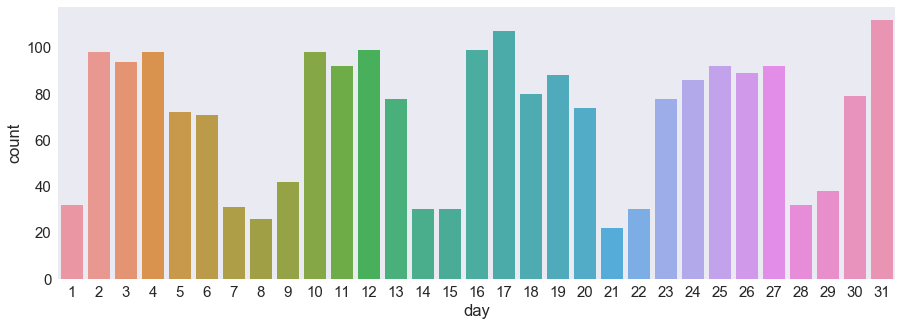

In [13]:
df_pop = df[df.mon_year == pop_mony]
sns.countplot(x = 'day', data = df_pop)

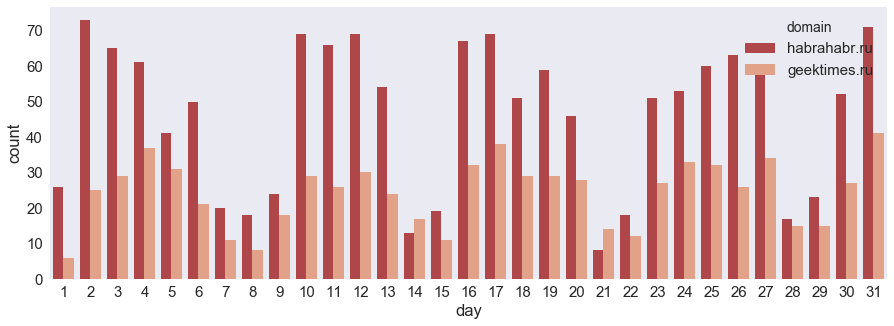

In [14]:
sns.countplot(x = 'day', hue='domain', data = df_pop)

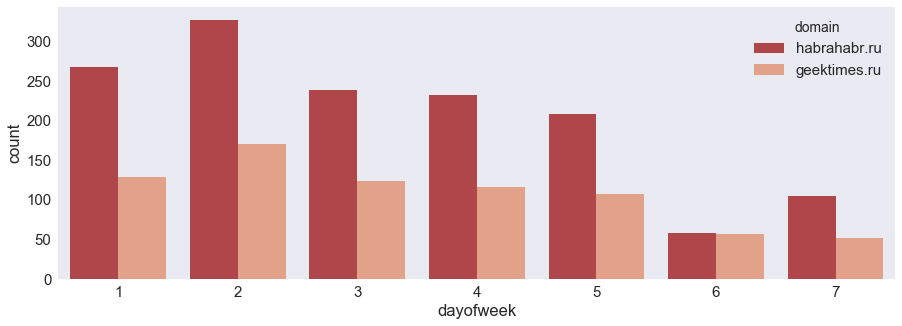

In [15]:
sns.countplot(x='dayofweek', hue='domain', data = df_pop)

# Когда лучше всего публиковать статью

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня;
* **Больше всего просмотров набирают статьи, опубликованные в 6 часов утра;**
* У опубликованных в 10 утра постов больше всего комментариев;
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 10 утра.

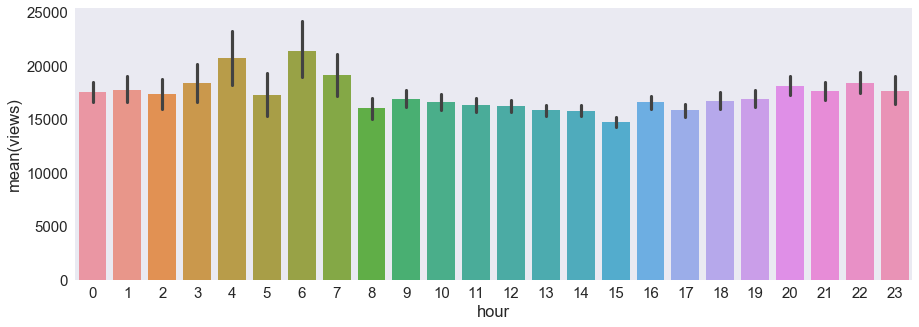

In [16]:
sns.barplot(x ='hour', y='views', data = df)

In [17]:
df.groupby('hour')[['views']].mean().sort_values('views', ascending=False).head()

,views
hour,
6,21354.310115
4,20678.389091
7,19093.953408
3,18370.017972
22,18365.387460


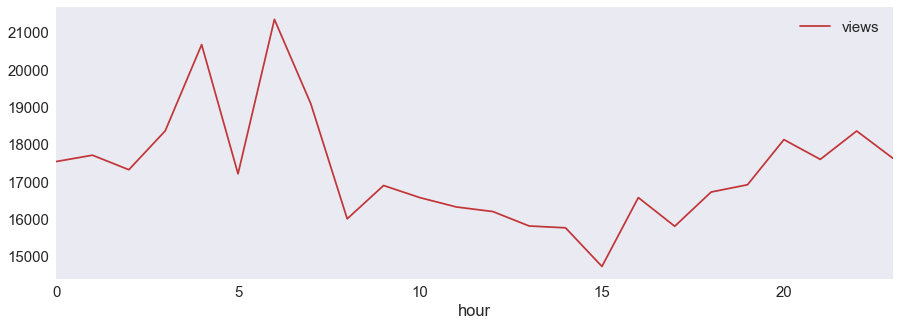

In [18]:
df.groupby('hour')[['views']].mean().plot()

       comments
hour           
4     53.657273
3     53.123877
6     51.799618
1     49.417910
2     48.827025


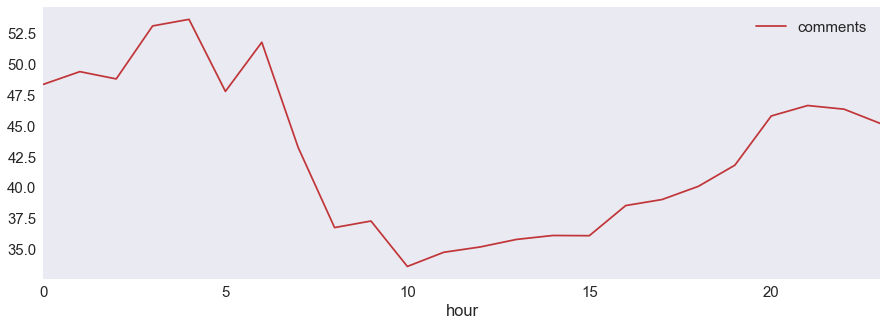

In [19]:
print(df.groupby('hour')[['comments']].mean().sort_values('comments', ascending=False).head())
df.groupby('hour')[['comments']].mean().plot()

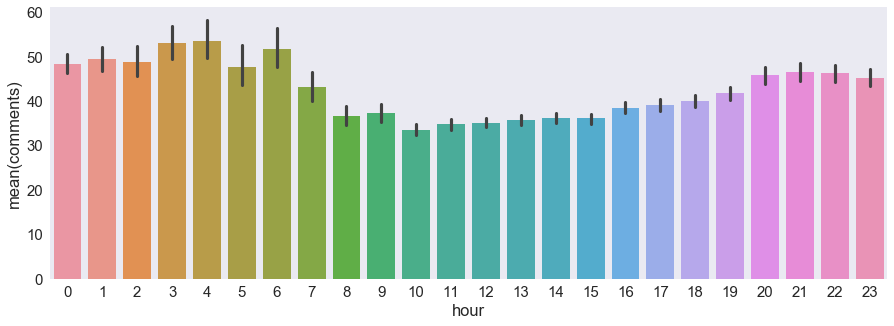

In [20]:
sns.barplot(x ='hour', y='comments', data = df)

In [21]:
df[df.domain == 'geektimes.ru'].sort_values('comments', ascending=False).head(2).T

,38763,65285
url,https://geektimes.ru/post/123157/,https://geektimes.ru/post/171853/
domain,geektimes.ru,geektimes.ru
post_id,123157,171853
published,2011-07-01 02:35:00,2013-03-06 20:07:00
author,@Dottore,@vadimus
flow,NaN,NaN
polling,False,False
content_len,2158,2220
title,Как раздавать инвайты на Google+,Лучшие компьютерные игры всех времен и народов...
comments,2266,1887


## Кого из топ-20 авторов чаще всего минусуют

* @Mordatyj
* **@Mithgol**
* @alizar
* @ilya42

In [22]:
top_20 = df.author.value_counts().index[:20]
df[df.author.isin(top_20)].groupby('author')[['votes_minus']].mean().sort_values('votes_minus', ascending=False)

,votes_minus
author,
@Mithgol,20.481081
@XaocCPS,15.286913
@andorro,13.654676
@aleksandrit,9.974643
@Sterhel,9.350785
@alizar,7.928191
@Mordatyj,7.471455
@ilya42,6.216797
@Tylerskald,5.518519


# Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером? (**нет**)

In [23]:
days = [1, 6]
df_week = df[df.dayofweek.isin(days)]
df_week.groupby('hour')

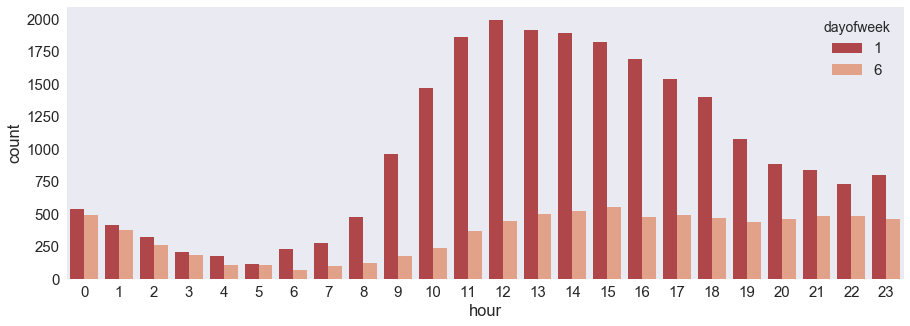

In [24]:
sns.countplot(x='hour', hue='dayofweek', data = df_week)

In [137]:
d = {'l': 2375, 'd': 1200}
df = pd.DataFrame(data=d, index = [1])
df['total'] = df['d'] + df['l']

In [138]:
df = df.append(pd.DataFrame([[df['total'][1]/2 - df['d'][1], df['total'][1]/2 - df['l'][1], 0]], 
                            columns = ['d', 'l', 'total']), ignore_index=True)
df = df.rename(index = {0:'all', 1:'debt'})
df = df.T
df['category'] = ['d', 'l', 'total']
df

,all,debt,category
d,1200.0,587.5,d
l,2375.0,-587.5,l
total,3575.0,0.0,total


In [139]:
d = {'total': [2375, 1200], 'name': ['l', 'd'], 'category':['spend', 'spend']}
df = pd.DataFrame(data=d, index = [0, 1])
df

,category,name,total
0,spend,l,2375
1,spend,d,1200


In [140]:
d = {'total':[sum(df['total'])/2 -df['total'][0], sum(df['total'])/2 -df['total'][1]], 
     'name':['l', 'd'], 'category':['debt', 'debt']}
df = df.append(pd.DataFrame(d))
df

,category,name,total
0,spend,l,2375.0
1,spend,d,1200.0
0,debt,l,-587.5
1,debt,d,587.5


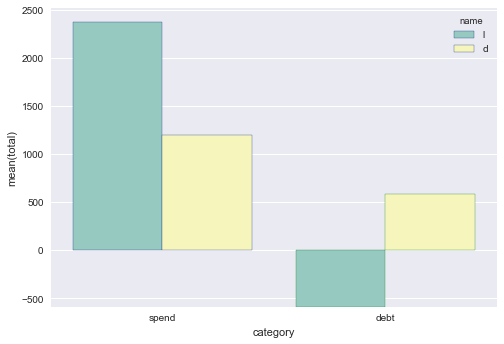

In [141]:
s = sns.barplot(data = df, x = 'category', y = 'total', hue = 'name', palette="Set3", 
            edgecolor=sns.color_palette("dark", 3))
s

In [142]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [143]:
trace0 = go.Bar(x = ['spend', 'debt'], y = [2375, -587.5], name = 'l')
trace1 = go.Bar(x = ['spend', 'debt'], y = [1200, 587.5], name = 'd')
data = [trace0, trace1]
layout = {'title': 'Fuck fuck', 'xaxis': {'title': 'type'}}

In [144]:
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

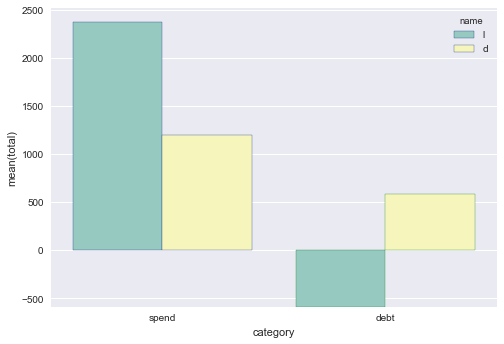

In [145]:
s = sns.barplot(data = df, x = 'category', y = 'total', hue = 'name', palette="Set3", 
            edgecolor=sns.color_palette("dark", 3))
s

In [146]:
df

,category,name,total
0,spend,l,2375.0
1,spend,d,1200.0
0,debt,l,-587.5
1,debt,d,587.5


In [ ]:
––